In [1]:
from qiskit.visualization import plot_histogram
from qiskit.circuit.classicalfunction import BooleanExpression
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.utils import QuantumInstance
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

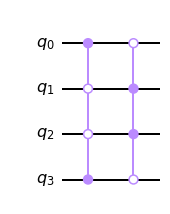

In [2]:
expression = BooleanExpression("(v0 ^ v1) & (v0 ^ v2) & (v1 ^ v3) & (v2 ^ v3)")
oracle = PhaseOracle(expression)
problem = AmplificationProblem(oracle)
oracle.draw('mpl')

In [3]:
simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=QuantumInstance(simulator, shots=10000))
result = grover.amplify(problem)
counts = result.circuit_results[0]

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
devices = provider.backends(n_qubits=5, operational=True, simulator=False)
device = least_busy(devices)

In [5]:
grover = Grover(quantum_instance=QuantumInstance(device, shots=10000))
result = grover.amplify(problem)
device_counts = result.circuit_results[0]

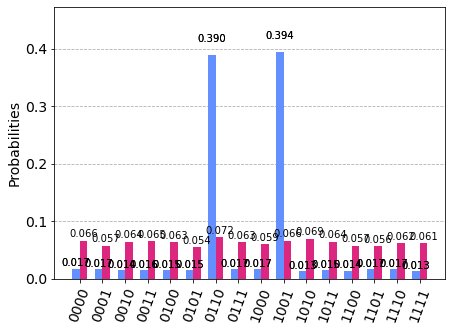

In [6]:
plot_histogram([counts, device_counts])